In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.json import json_normalize

In [2]:
x=pd.read_csv('../data/features/feature_sets/features_x_train_na_less_20_median_upsample_00.csv')

In [3]:
x.head()

,KW1,KW2,KW3,KW4,KW5,KW6,KW7,KW8,KW9,KW10,...,market_data_circulating_supply,market_data_current_price_usd,market_data_ath_usd,links_homepage,market_data_low_24h_usd,market_data_high_24h_usd,links_blockchain_site,market_data_first_time_trading,market_data_total_supply,links_twitter_screen_name
0,0.006019,0.005119,0.004673,0.004449,0.003426,0.003677,0.003789,0.003348,0.003268,0.003285,...,8.627700e+13,0.001677,0.034182,1,0.001677,0.001687,1,1,6.565882e+07,1
1,0.316524,0.283267,0.300112,0.301383,0.251838,0.231143,0.227330,0.249554,0.248405,0.237959,...,6.008030e+15,0.231561,43587.000000,1,0.194051,0.232567,1,1,1.000000e+09,1
2,0.002341,0.001733,0.002813,0.003344,0.002585,0.002853,0.002989,0.003414,0.003350,0.002857,...,4.400000e+08,0.000717,0.043750,1,0.000714,0.000764,1,1,5.000000e+08,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.033603,43505.000000,1,0.021140,0.033734,1,1,5.000000e+06,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000887,0.030843,1,0.000887,0.000887,1,1,1.000000e+07,1


In [4]:
path = '../data/features/feature_sets/features_y_train_na_less_20_median_upsample_00.np'

In [5]:
y = pd.DataFrame(np.fromfile(path, dtype=int))

In [6]:
y[0].value_counts()

0    4075
1     682
Name: 0, dtype: int64

In [7]:
y.head()

,0
0,0
1,1
2,0
3,0
4,0


In [8]:
def upsample_data(x, y, upsampling):
    df = x.assign(success=y)
    df_success = df.loc[df.success == 1]
    quantity = int(len(df_success) * upsampling)
    to_append = df_success.sample(quantity, random_state=123, replace=True)
    df_upsampled = df.append(to_append)
    assert len(df_upsampled) == (len(df) + len(to_append)
                                 ), "Length is wrong after upsampling."

    trn_X = df_upsampled.drop('success', axis=1)
    trn_y = df_upsampled.success
    return trn_X, trn_y

In [13]:
trn_x_00, trn_y_00 = upsample_data(x, y, 0.0)
trn_x_25, trn_y_25 = upsample_data(x, y, 0.25)
trn_x_50, trn_y_50 = upsample_data(x, y, 0.50)
trn_x_75, trn_y_75 = upsample_data(x, y, 0.75)

In [15]:
li = [trn_y_00, trn_y_25, trn_y_50, trn_y_75]

In [38]:
import seaborn as sns
sns.set()

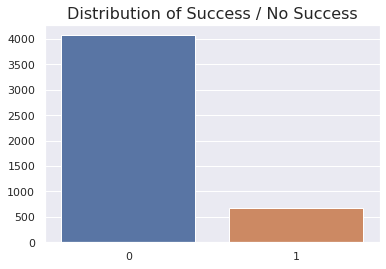

In [42]:
ax = sns.barplot(x, y);
ax.set_title("Distribution of Success / No Success", fontsize=16);


In [110]:
import matplotlib.gridspec as gridspec

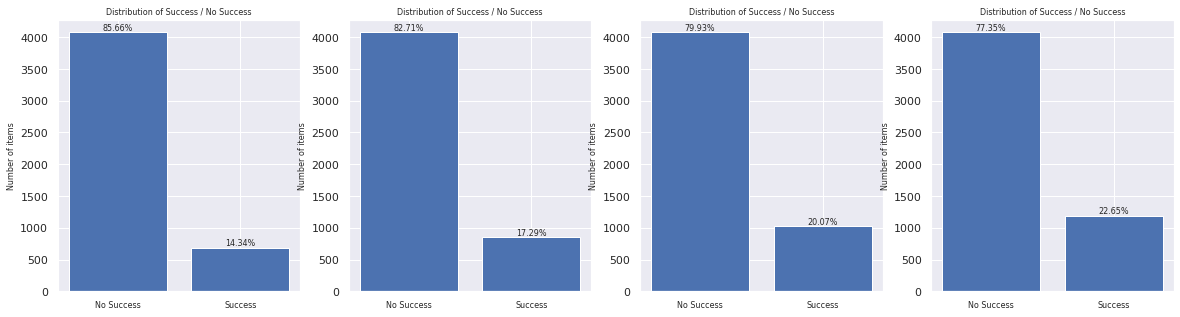

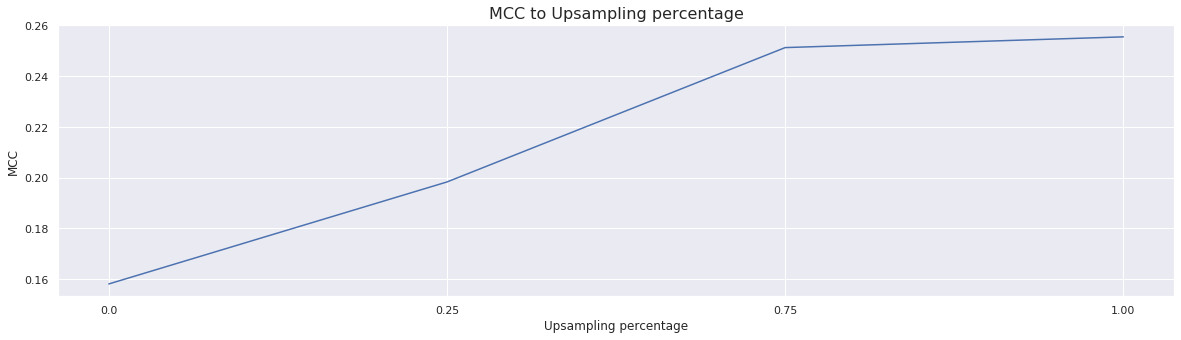

In [113]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

for trn, ax in zip(li, axs):
    x = trn.value_counts().index.values
    y = trn.value_counts().values
    ax.bar(x, y);
    ax.set_title("Distribution of Success / No Success", fontsize=8);
    ax.set_xticks([0,1]);
    ax.set_xticklabels(["No Success", "Success"], fontsize=8);
    ax.set_ylabel("Number of items", fontsize=8)

    rects = ax.patches

    labels = np.round(y / sum(y) * 100,2)

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, "{}%".format(label),
                ha='center', va='bottom', fontsize=8)

    # sns.pointplot([0,1], [2000, 3000])

fig1, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5))
#ax.plot([0, 0.25, 0.50, 0.75], [0.18, 0.19, 0.20, 0.21])
ax.plot(x_line, y_line);
ax.set_title("MCC to Upsampling percentage", fontsize=16);
ax.set_xlabel("Upsampling percentage", fontsize=12);
ax.set_ylabel("MCC", fontsize=12);

In [117]:
fig.savefig('../reports/figures/balanced.png', bbox_inches='tight')
fig1.savefig('../reports/figures/mcc_balanced.png', bbox_inches='tight')

In [103]:
x_line = bar_chart.upsampling.values
y_line = bar_chart.mcc.values

In [85]:
res = pd.read_json('../data/results/result.json')
res = res.assign(mcc = json_normalize(res.metrics).values)
res_mcc = res[['feature_set', 'mcc', 'model_name']]
res_mcc = res_mcc.sort_values('mcc', ascending=False)
metas=[]
for i in res.features.values:
    metas.append(i[0])
metas_df= json_normalize(metas)
res_mcc['upsampling'] = metas_df
res_mcc

,feature_set,mcc,model_name,upsampling
19,na_less_20_median_upsample_100,0.273497,catboost,1.00
4,na_less_20_median_upsample_100,0.256824,lbm,1.00
20,na_less_20_median_upsample_100,0.255453,lbm,1.00
18,na_less_20_median_upsample_75,0.251225,lbm,0.75
7,na_less_20_median_upsample_50,0.247127,catboost,0.5
35,na_less_50_mixed_upsampling_40,0.245203,catboost,0.4
27,na_less_20_min_upsample_50,0.237554,catboost,0.5
17,na_less_20_median_upsample_75,0.236624,catboost,0.75
6,na_less_20_median_upsample_50,0.236598,catboost,0.5
33,na_less_20_delete_upsample_50,0.232251,catboost,0.5


In [86]:
res_mcc

,feature_set,mcc,model_name,upsampling
19,na_less_20_median_upsample_100,0.273497,catboost,1.00
4,na_less_20_median_upsample_100,0.256824,lbm,1.00
20,na_less_20_median_upsample_100,0.255453,lbm,1.00
18,na_less_20_median_upsample_75,0.251225,lbm,0.75
7,na_less_20_median_upsample_50,0.247127,catboost,0.5
35,na_less_50_mixed_upsampling_40,0.245203,catboost,0.4
27,na_less_20_min_upsample_50,0.237554,catboost,0.5
17,na_less_20_median_upsample_75,0.236624,catboost,0.75
6,na_less_20_median_upsample_50,0.236598,catboost,0.5
33,na_less_20_delete_upsample_50,0.232251,catboost,0.5


In [99]:
bar_chart = res_mcc.loc[[12, 14, 20, 18]]

In [100]:
bar_chart.sort_values('upsampling', inplace=True)

In [101]:
bar_chart

,feature_set,mcc,model_name,upsampling
12,na_less_20_median_upsample_00,0.158151,lbm,0.0
14,na_less_20_median_upsample_25,0.198311,lbm,0.25
18,na_less_20_median_upsample_75,0.251225,lbm,0.75
20,na_less_20_median_upsample_100,0.255453,lbm,1.00


In [84]:
trn_x, trn_y = upsample_data(df, y_train, 2)
trn_y.value_counts()

0    4075
1    2046
Name: success, dtype: int64

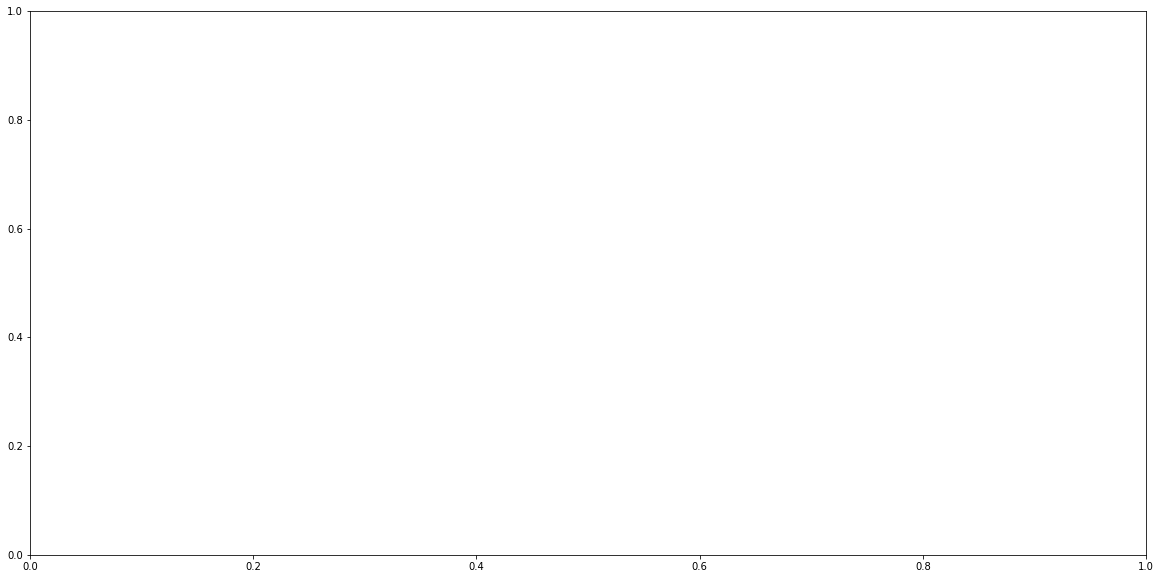

In [83]:
fig, ax = plt.subplots(figsize=(20,10))



ax.bar(x,y)